In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
from glob import glob
import sys

import util_tr_new as tr
from scipy import interpolate  # , signal
from scipy.signal import savgol_filter

datadir = Path("/Users/uedataiga/Desktop/grad-research/data_analysis/Data/PPMS/231128_#1-1382(1-1)")
sample = "1382"
if not os.path.exists(datadir / sample):
    os.mkdir(datadir / sample)
savedir = datadir / sample


current=  5e-05


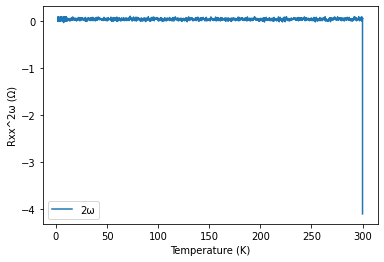

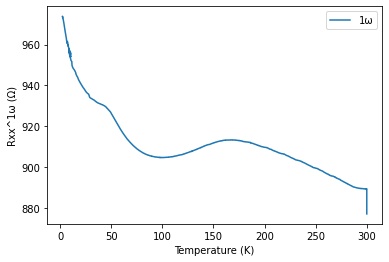

RT.csv saved


In [2]:
# RT
df_dict = {}
# for filename in sorted(glob(str(datadir / "3_14T_sweep_*e-*A.txt"))):
filename = str(datadir / "1_RT.txt")
key = Path(filename).stem
current_float = 50e-6

with open(filename, "r") as f:
    df = []
    i = 0
    while True:
        line = f.readline()
        if not line:
            break
        elif i == 0:
            header = line.split("\t")
        else:
            df.append([float(x) for x in line.split("\t")])
        i += 1
df = pd.DataFrame(df, columns=header)
# df_dict[Path(filename).stem] = df
df = df[["Temperature (K)", "Field (Oe)", "Lock-in1(X)", "Lock-in1(Y)", "Lock-in2(X)", "Lock-in2(Y)"]]
df.to_csv(savedir / ("raw_RT.csv"), index=False)

B_raw = df["Field (Oe)"].values * 1e-4  # Oe -> T
# fixed_temp = df["Temperature (K)"].mean()
temp = df["Temperature (K)"].values
V2omega_raw = df["Lock-in2(Y)"].values
V1omega_raw = -df["Lock-in1(X)"].values  # 位相180°回転に注意

print("current= ", current_float)
Rxx2omega = V2omega_raw / current_float
Rxx1omega = V1omega_raw / current_float
current = np.full_like(temp, current_float)
plt.plot(temp, Rxx2omega, label="2ω")
plt.xlabel("Temperature (K)")
plt.ylabel("Rxx^2ω (Ω)")
plt.legend()
plt.show()
plt.plot(temp, Rxx1omega, label="1ω")
plt.xlabel("Temperature (K)")
plt.ylabel("Rxx^1ω (Ω)")
plt.legend()
plt.show()

new_df = pd.DataFrame({"temp": temp, "current": current, "B": B_raw, "V2omega": V2omega_raw, "V1omega": V1omega_raw, "Rxx2omega": Rxx2omega, "Rxx1omega": Rxx1omega})
new_df.to_csv(savedir / "RT.csv", index=False)
print("RT" + ".csv saved")

1_9T_sweep_50uA_100K
1_9T_sweep_50uA_10K
1_9T_sweep_50uA_20K
1_9T_sweep_50uA_2K
1_9T_sweep_50uA_30K
1_9T_sweep_50uA_40K
1_9T_sweep_50uA_5K
1_9T_sweep_50uA_60K
1_9T_sweep_50uA_80K
------------------1_9T_sweep_50uA_100K------------------


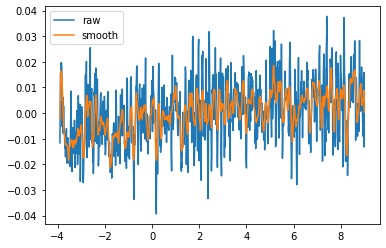

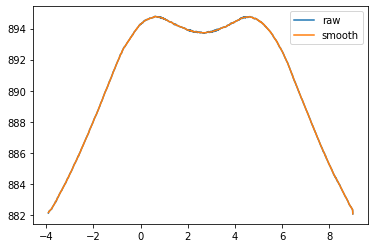

777 1.00133
R0 =  894.7742557672535 , B =  0.638944
gamma =  8.822512299778451e-14
1_9T_sweep_50uA_100K.csv saved
------------------1_9T_sweep_50uA_10K------------------


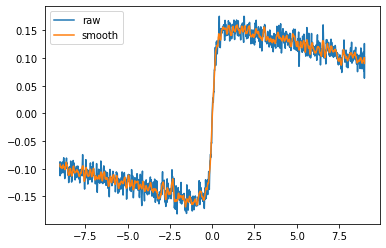

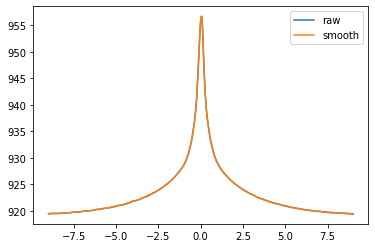

843 1.0022
R0 =  956.6787741933603 , B =  0.0415176
gamma =  1.3121359519015479e-12
1_9T_sweep_50uA_10K.csv saved
------------------1_9T_sweep_50uA_20K------------------


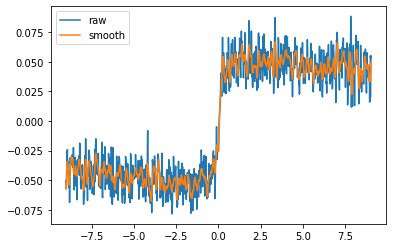

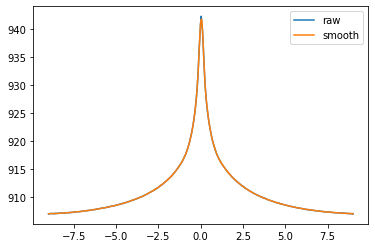

796 1.0017200000000002
R0 =  941.7621507887485 , B =  0.0291568
gamma =  4.194214852372153e-13
1_9T_sweep_50uA_20K.csv saved
------------------1_9T_sweep_50uA_2K------------------


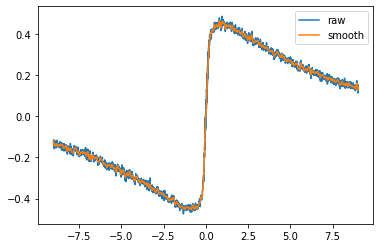

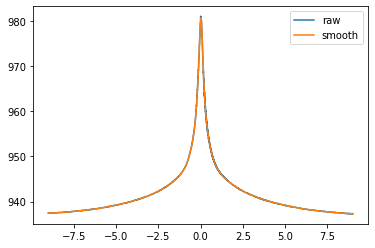

1250 1.00118
R0 =  980.7216240136203 , B =  0.0208362
gamma =  3.698905151994109e-12
1_9T_sweep_50uA_2K.csv saved
------------------1_9T_sweep_50uA_30K------------------


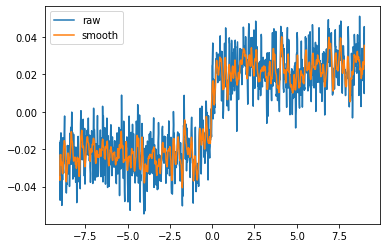

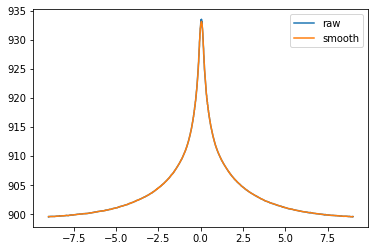

767 1.0073
R0 =  933.1501357657174 , B =  0.0439054
gamma =  2.1711397903121627e-13
1_9T_sweep_50uA_30K.csv saved
------------------1_9T_sweep_50uA_40K------------------


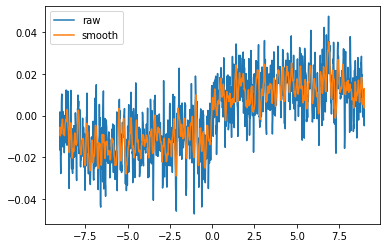

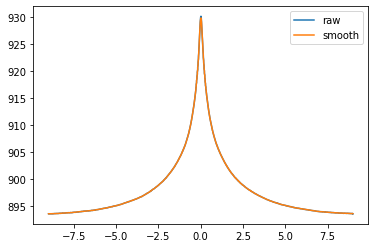

765 1.00394
R0 =  929.906864076805 , B =  0.014695300000000001
gamma =  5.066058067341474e-14
1_9T_sweep_50uA_40K.csv saved
------------------1_9T_sweep_50uA_5K------------------


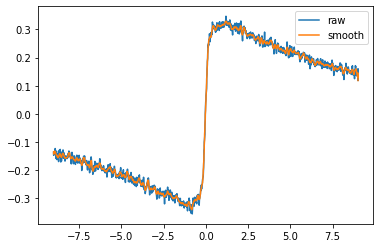

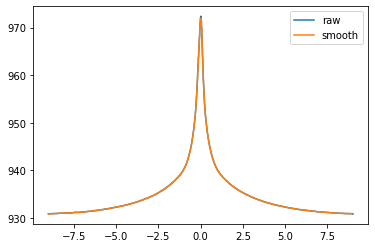

839 0.9922620000000001
R0 =  971.9359993952266 , B =  0.00906074
gamma =  2.60690088966858e-12
1_9T_sweep_50uA_5K.csv saved
------------------1_9T_sweep_50uA_60K------------------


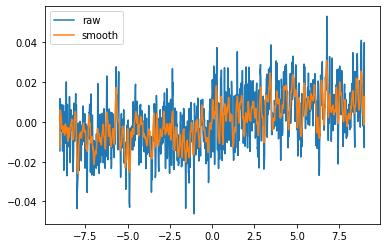

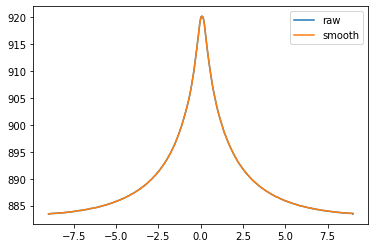

794 1.0089299999999999
R0 =  920.1191424242279 , B =  0.0742087
gamma =  5.0602710677726753e-14
1_9T_sweep_50uA_60K.csv saved
------------------1_9T_sweep_50uA_80K------------------


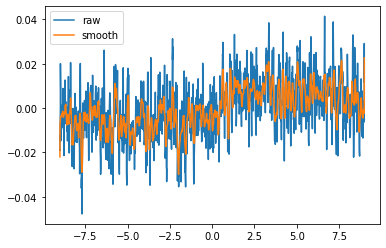

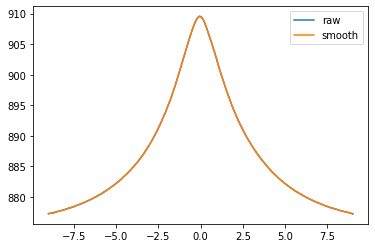

770 1.00371
R0 =  909.5367148375971 , B =  -0.0413664
gamma =  -5.590223849644762e-15
1_9T_sweep_50uA_80K.csv saved
Rxx_1T_current_dep.csv saved
[99.99989330682571, 9.999644046001045, 19.99981467331118, 2.31524965202109, 30.00082084052965, 39.999955083285464, 4.999971909994767, 59.9999984991662, 80.00008252262444]


In [4]:
thickness = 2e-8  # m = 20 nm
width = 2e-5  # m = 20 um
e = 1.602e-19  # C

# Rxx2omegaの最大の値を計算するためのBの位置
B_Rxx2omega, thresh_Rxx2omega = 1, 0.01
# gammaを計算するためのBの位置
B_gamma, thresh_gamma = 1, 0.01


# temp_dep
df_dict = {}
for filename in sorted(glob(str(datadir / "1_9T_sweep_50uA_*K.txt"))):
    print(Path(filename).stem)
    with open(filename, "r") as f:
        df = []
        i = 0
        while True:
            line = f.readline()
            if not line:
                break
            elif i == 0:
                header = line.split("\t")
            else:
                df.append([float(x) for x in line.split("\t")])
            i += 1
    df = pd.DataFrame(df, columns=header)
    df_dict[Path(filename).stem] = df


# Lock-in2(Y)のみのデータを抽出
# それをI^2で割った値を新たなカラムに追加
# 反対称化
# csv保存
Rxx_lowB_means, Rxx_lowB_stds, currents, gammas, temps, R0s = [], [], [], [], [], []
for key in df_dict.keys():
    print(f"------------------{key}------------------")
    df = df_dict[key]
    df = df[["Temperature (K)", "Field (Oe)", "Lock-in1(X)", "Lock-in1(Y)", "Lock-in2(X)", "Lock-in2(Y)"]]
    df.to_csv(savedir / ("raw_" + key + ".csv"), index=False)

    B_raw = df["Field (Oe)"].values * 1e-4  # Oe -> T
    fixed_temp = df["Temperature (K)"].mean()
    temps.append(fixed_temp)

    # NOTE: 磁場の定義が逆だったので，符号を反転
    V2omega_raw = -df["Lock-in2(Y)"].values
    # V1omega_raw = df["Lock-in1(Y)"].values
    # NOTE: 位相180°回転に注意
    V1omega_raw = -df["Lock-in1(X)"].values
    B_ref_u, _, V2omega_u, B_ref_d, _, V2omega_d = tr.symmetrize(*tr.split_up_down_scans(B_raw, V2omega_raw))
    B_ref_u, V1omega_u, _, B_ref_d, V1omega_d, _ = tr.symmetrize(*tr.split_up_down_scans(B_raw, V1omega_raw))
    # (x_ref_u, y_sym_u, y_asym_u, x_ref_d, y_sym_d, y_asym_d)

    # V2omega_d_int = interpolate.interp1d(B_ref_d, V2omega_d)
    # V2omega_u_int = interpolate.interp1d(B_ref_u, V2omega_u)
    temp = np.full_like(B_ref_u, fixed_temp)

    current_float = 50e-6  # float(key[-5:-1])
    Rxx2omega_u = V2omega_u / current_float
    Rxx2omega_d = V2omega_d / current_float
    Rxx1omega_u = V1omega_u / current_float
    Rxx1omega_d = V1omega_d / current_float
    Rxx2omega_d_smooth = savgol_filter(Rxx2omega_d, 21, 3)
    Rxx2omega_u_smooth = savgol_filter(Rxx2omega_u, 21, 3)
    Rxx1omega_d_smooth = savgol_filter(Rxx1omega_d, 21, 3)
    Rxx1omega_u_smooth = savgol_filter(Rxx1omega_u, 21, 3)
    plt.plot(B_ref_d, Rxx2omega_d, label="raw")
    plt.plot(B_ref_d, Rxx2omega_d_smooth, label="smooth")
    plt.legend()
    plt.show()
    plt.plot(B_ref_d, Rxx1omega_u, label="raw")
    plt.plot(B_ref_d, Rxx1omega_u_smooth, label="smooth")
    plt.legend()
    plt.show()
    current = np.full_like(B_ref_u, current_float)

    # Rxx2omega_dの3T前後の20点の平均，標準偏差を計算

    idx_lowB = np.where(np.abs(np.array(B_ref_d) - B_Rxx2omega) < thresh_Rxx2omega)[0][0]
    print(idx_lowB, B_ref_d[idx_lowB])
    # Rxx_3T_mean = np.mean(Rxx2omega_d_smooth[idx_3T - 10 : idx_3T + 10])
    # Rxx_3T_std = np.std(Rxx2omega_d_smooth[idx_3T - 10 : idx_3T + 10])
    Rxx_lowB_mean = np.mean(Rxx2omega_d_smooth[idx_lowB - 10 : idx_lowB + 10])
    Rxx_lowB_std = np.std(Rxx2omega_d_smooth[idx_lowB - 10 : idx_lowB + 10])
    Rxx_lowB_means.append(Rxx_lowB_mean)
    Rxx_lowB_stds.append(Rxx_lowB_std)
    currents.append(current_float)

    idx_lowB_p = np.where(np.abs(np.array(B_ref_d) - B_gamma) < thresh_gamma)[0][0]
    idx_lowB_n = np.where(np.abs(np.array(B_ref_d) + B_gamma) < thresh_gamma)[0][0]
    DeltaR = Rxx2omega_d_smooth[idx_lowB_p] - Rxx2omega_d_smooth[idx_lowB_n]
    DeltaB = B_ref_d[idx_lowB_p] - B_ref_d[idx_lowB_n]

    current_density = current_float / (width * thickness)  # A/m^2
    # print("current_density = ", current_density)
    # R0 = 0.041106 / current_float  # Ω
    # Rxx1omegaの最大値をR0とする
    R0 = Rxx1omega_d_smooth[np.argmax(Rxx1omega_d_smooth)]
    print("R0 = ", R0, ", B = ", B_ref_d[np.argmax(Rxx1omega_d_smooth)])

    gamma = (DeltaR / DeltaB) / (current_density * R0)
    print("gamma = ", gamma)
    gammas.append(gamma)
    R0s.append(R0)

    Rxx2omega_d_over_R0_B = Rxx2omega_d_smooth / (R0 * current_density)
    Rxx2omega_u_over_R0_B = Rxx2omega_u_smooth / (R0 * current_density)

    new_df = pd.DataFrame({"temp": temp, "current": current, "B_ref_d": B_ref_d, "B_ref_u": B_ref_u, "V2omega_u": V2omega_u, "V2omega_d": V2omega_d, "V1omega_d": V1omega_d, "V1omega_u": V1omega_u, "Rxx2omega_u": Rxx2omega_u_smooth, "Rxx2omega_d": Rxx2omega_d_smooth, "Rxx1omega_u": Rxx1omega_u_smooth, "Rxx1omega_d": Rxx1omega_d_smooth, "Rxx2omega_d_over_R0_B": Rxx2omega_d_over_R0_B, "Rxx2omega_u_over_R0_B": Rxx2omega_u_over_R0_B})
    new_df.to_csv(savedir / (key + ".csv"), index=False)
    print(key + ".csv saved")

sort_idx = np.argsort(np.array(temps))
temps_summary, Rxx_lowB_means_summary, Rxx_lowB_stds_summary = np.array(temps)[sort_idx], np.array(Rxx_lowB_means)[sort_idx], np.array(Rxx_lowB_stds)[sort_idx]
df_current_dep = pd.DataFrame({"temp": temps_summary, "Rxx_lowB_mean": Rxx_lowB_means_summary, "Rxx_lowB_std": Rxx_lowB_stds_summary})
df_current_dep.to_csv(savedir / f"Rxx_{B_Rxx2omega}T_current_dep.csv", index=False)
print(f"Rxx_{B_Rxx2omega}T_current_dep.csv saved")

sort_idx = np.argsort(np.array(temps))
temps_gamma, gammas_gamma, R0s_gamma = np.array(temps)[sort_idx], np.array(gammas)[sort_idx], np.array(R0s)[sort_idx]
print(temps)
df_gamma = pd.DataFrame({"temp": temps_gamma, "gamma": gammas_gamma, "R0": R0s_gamma})
df_gamma.to_csv(savedir / f"gamma_{B_gamma}T.csv", index=False)

In [31]:
df_gamma

,temp,gamma,R0
0,2.315250,4.642476e-14,894.759312
1,4.999972,4.673630e-12,955.361649
2,9.999644,1.598514e-12,940.409608
3,19.999815,1.452194e-11,979.493197
4,30.000821,6.706940e-13,931.829988
5,39.999955,3.240506e-13,927.745460
6,59.999998,1.012882e-11,969.473017
7,80.000083,3.889990e-13,920.039939
8,99.999893,1.542117e-14,909.518274
